PROJECT - PREDICTING HOUSING PRICES

A virtual environment will be cretaed using Poetry and the packages needed throughout the project will be added. 
In this project Poetry + Pyenv is used for managing the different evrsions of Python as well as to keep track of many dependencies needed in the project. 
Problem: Tensorflow required a different version of Python and Numpy than the ones being currently used. With the help of Poetry + Pyenv problem was solved. 

Steps to create a virtual environemnt and to install dependencies: 
1. Find the path of your document (type "pwd" on terminal)
2. Type "poetry init" to initialize the project
3. Type "Poetry shell" to activate the virtual environment
4. Choose the new VE from "select kernel" on up right corner
5. Add dependencies using "poetry add" (you can check the packgages and their versions from your pyproject.toml file) * in this case one doesn't need to run poetry install command since when poetry add is used it also installs automatically

In [2]:
# A test to see if imported package is working
import numpy as np
arr = np.array([1, 2, 3, 4, 5])
print(arr)

[1 2 3 4 5]


After setting up the project envrionment, next step in the pipleine is to download the dataset from Kaggle

In [ ]:
import pandas as pd
train_set = "/Users/serraus/Desktop/house-prices-advanced-regression-techniques/train.csv"
pd.read_csv(train_set)


* The data set has 1460 rows and 81 columns. If the "Id" column is excluded, there are 79 different features, which are qualities of a hosue in Iowa region, in this dataset which might effect the target which is the "SalePrice" of a house. 
* The data consists of categorical data like in the "Street" column as well as numerical data as in for example "LotArea" column.
* The data looks dirty since there are some "NaN" values in columns like "Alley". 

Seeing some statistics helps to understand the data more. Running the .describe() command will show some meaningful values. 

In [4]:
data = pd.read_csv(train_set)
print(data.describe()) #to see descriptive statistics of each column

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

Although some measures are meaningless such as the mean of id column, many are valuable like the mean LotArea in houses in Iowa region.

In order to have some visualization a random feture is picked it's relationship with the target SalePrice is analyzed in a regression graph.
LotArea is picked as the feture in other words x value and SalePrice will be y.

<Axes: xlabel='LotArea', ylabel='SalePrice'>

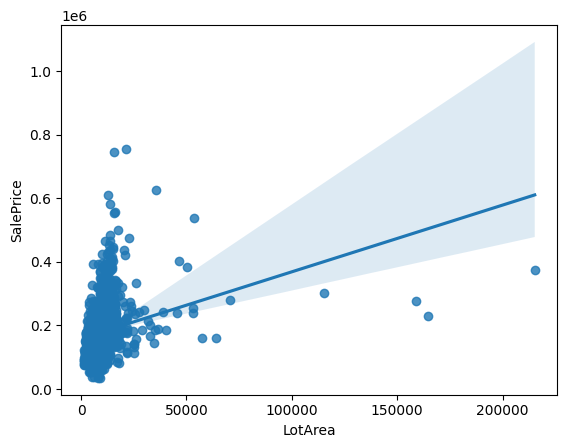

In [5]:
import seaborn as sns #seaborn is the library i will use for graphs
sns.regplot(x = data["LotArea"], y = data["SalePrice"]) #regplot is for a regression graph


This graph is badly scaled since SalePrice values are much larger than LotArea values. But as a general comment one can say that it seems like as the LotArea increases SalePrice tend to increase.

After looking at the data in detail, one needs to first clean it so that the machine learning models can perform better and faster.

One can perform data cleaning in many different ways:
1. Deleting rows that have missing values (This method is hardly ever accepted as this possibly deletes every row in our data set)  
2. Deleting columns that have missing values (This method works much better than number 1 but still causes possible losses in data that might be important)
3. Imputation (This method is where missing values are replaced with a number, this method sometimes helps and is much better than 1 and 2) 
*To apply imputation one should only have numeric values

In [ ]:
data.dropna() #method 1

As expected this resulted in all rows deleted since there is at least one NaN value in each row. This will not be used.

In [ ]:
data.dropna(axis = 1) #method 2

In [44]:
#to see which columns got deleted
original = data.columns
new = data.dropna(axis= 1).columns
removed_columns = list(set(original) - set(new))
print(removed_columns)
print("Number of columns removed: ", len(removed_columns))


['Electrical', 'GarageCond', 'GarageQual', 'MasVnrType', 'MiscFeature', 'GarageType', 'FireplaceQu', 'BsmtFinType1', 'BsmtExposure', 'MasVnrArea', 'PoolQC', 'Fence', 'BsmtCond', 'GarageYrBlt', 'LotFrontage', 'GarageFinish', 'Alley', 'BsmtQual', 'BsmtFinType2']
Number of columns removed:  19


Some of these values could be crucially important to define the SalePrice of a house. One can try this data set as well as the data set with method 3 and compare the accuracies at the end. 

Before applying method 3 one needs to decide what to do with categorical data. There are 3 ways one can deal with categorical data:
1. Delete columns with categorical data (Like beofre causes loss of data)
2. Apply ordinal encoding (This is where each word in the column gets assigned a number) 
3. Apply one-hot encoding (This is where each word in the column gets its own new column and value of 1 or 0 is used for each row - 1 indicating it's present 0 it's not present-)

NOTE: Method 3 will not be tried since there are 19 columns with categorical data each having different categroies as input. This would result in so many new columns of data which in turn actually results in not optimal results. 

In [ ]:
data.select_dtypes(exclude = "object") #method 1

In [ ]:
from sklearn.preprocessing import OrdinalEncoder #method 2
label_data  = data.copy()
object_columns = [col for col in label_data.columns if label_data[col].dtype == "object"]
label_data[object_columns] = OrdinalEncoder().fit_transform(data[object_columns])
print(label_data)

After applying ordinal encoding, only numerical data is present in the dataset which in turn allows imputing to be applied. 

In [ ]:
#method 3
from sklearn.impute import SimpleImputer
imputed_data = pd.DataFrame(SimpleImputer().fit_transform(label_data))
#imputation removes column names, to get them back:
imputed_data.columns = data.columns
print(imputed_data)

----------------------------------------

Data preprocessing/cleaning helps machine learning models to become more accurate. Next step is feature engineering where valuable features are selected from the data set and unwanted ones are excluded. In addition new features could also be created by combining existing ones which also helps the machine learning model to work faster since the dataset will be less complex and also become more accurate. 

There are different methods that can be applied: 
1. Calculating Mutual Information Scores (This is a function that measures the relationship with a feature and the target in terms of uncertainty)
2. Creating Features (Combining existing fetaures with a certain aggregation function)


NOTE: There are more feature engineering techniques which can be applied to categorical data. However in this project it is decided that only numerical values will be used. #because the algorithms only work well with numerical data?????#

In [61]:
from sklearn.feature_selection import mutual_info_regression
x = imputed_data
y = imputed_data["SalePrice"]
def mi_scores(x, y): #one can make a function so that one doesn't need to copy the code over and over again if needed to be sued
    mi = mutual_info_regression(x, y)
    mi = pd.Series(mi, index = x.columns) #to create a table looking output to see mi scores for each column by name
    mi = mi.sort_values(ascending = False) #highest mi scored values will be on top
    return mi
mi = mi_scores(x, y)
mi[:10] #to see top 10 gighest mi scores


SalePrice       5.597490
OverallQual     0.560917
Neighborhood    0.504427
GrLivArea       0.480665
GarageCars      0.371075
TotalBsmtSF     0.366533
YearBuilt       0.365768
GarageArea      0.361556
BsmtQual        0.331405
ExterQual       0.330838
dtype: float64

Overall Quality of a house is the feature with the highest mi score. This means that knowing the overall quality will tell us the most about SalePrice. It will reduce the uncertainty in SalePrice the most. The second most valuable feature is the neighbourghood the house is in. It is important to note that although a feature has a low mi score when combined with another might indeed tell a lot about the target.
#graph???????#

These MI scores turned out lower than expected. New features that will be created might have higher scores. At least this is what is expected. 

New features: 
- Age of the House (AgeHouse) since age of the house can tell a lot about the sale price. 
- Total Sqaure Footage (TotalSF) since total area of the house instead of individual areas of rooms and basement might be more important and can help machine learning model to work faster. 
- Whether the hosue has a pool or not (HasPool) since pools are known to add value to a house. This will be a 1 or 0 (boolean) data. 

In [103]:
imputed_data['AgeHouse'] = imputed_data['YrSold'] - imputed_data['YearBuilt']
imputed_data['TotalSF'] = imputed_data['1stFlrSF'] +  imputed_data['2ndFlrSF'] + imputed_data['TotalBsmtSF']
imputed_data['HasPool'] = [1 if area > 0 else 0 for area in imputed_data['PoolArea']]
new_data = imputed_data[['AgeHouse', 'TotalSF', 'HasPool']]

print(new_data)


      AgeHouse  TotalSF  HasPool
0          5.0   2566.0        0
1         31.0   2524.0        0
2          7.0   2706.0        0
3         91.0   2473.0        0
4          8.0   3343.0        0
...        ...      ...      ...
1455       8.0   2600.0        0
1456      32.0   3615.0        0
1457      69.0   3492.0        0
1458      60.0   2156.0        0
1459      43.0   2512.0        0

[1460 rows x 3 columns]


In the next step MI scores of the new features will be calculated. The expectation is that they get a higher MI score than the individual MI scores that make up the new feature. 

In [100]:
new_mi = mi_scores(x, y)
new_mi[:20]


SalePrice       5.586149
TotalSF         0.677148
OverallQual     0.562252
Neighborhood    0.511180
GrLivArea       0.481215
YearBuilt       0.372344
TotalBsmtSF     0.369121
GarageArea      0.367613
GarageCars      0.364780
AgeHouse        0.338756
KitchenQual     0.337256
BsmtQual        0.332120
ExterQual       0.317692
1stFlrSF        0.311478
GarageYrBlt     0.300494
FullBath        0.271872
MSSubClass      0.266939
GarageFinish    0.262073
YearRemodAdd    0.247487
TotRmsAbvGrd    0.214968
dtype: float64

Total Square Footage got a higher MI score than the highest feature in the original data set. 
Age of the House scored lower than the year built, however higher than the year sold which is a feature that makes it. HasPool not ended up in the lists. This may be due to other factors such as many houses in the region not having a pool. 

In [104]:
print(imputed_data['HasPool'].sum()) #to see number of houses with a pool

7


As expected the number is too low that it cannot contribute to the statistics. 

In [101]:
new_mi.tail(20) #to see last 20 values

RoofMatl        0.014365
BsmtHalfBath    0.013207
MiscFeature     0.011677
BsmtFullBath    0.010442
ExterCond       0.009473
Utilities       0.008032
Heating         0.004309
BsmtFinSF2      0.003160
MiscVal         0.000000
YrSold          0.000000
MoSold          0.000000
Id              0.000000
PoolQC          0.000000
PoolArea        0.000000
3SsnPorch       0.000000
Functional      0.000000
LowQualFinSF    0.000000
LandSlope       0.000000
Street          0.000000
HasPool         0.000000
dtype: float64

Last 16 values received a really low MI score (0.00 ...) especially the last 10 which all received a score of 0. This means that knowing those features does not make one more confident about the target. Although one should not rely merely on MI scores since some of these features when combined with others may become useful, in this model the aim is also to make the model become computationally more efficient and since the scores are too low they will be discarded from the actual dataset. 

In [ ]:
columns_to_be_removed = [
    'ExterCond',
    'Utilities',
    'Heating',
    'BsmtFinSF2',
    'MiscVal',
    'YrSold',
    'MoSold',
    'Id',
    'PoolQC',
    'PoolArea',
    '3SsnPorch',
    'Functional',
    'LowQualFinSF',
    'LandSlope',
    'Street',
    'HasPool'
]
imputed_data.drop(columns=columns_to_be_removed, inplace=True) #inplace = True modifies the original DataFrame
print(imputed_data)
